Three observations or inferences that can be made from the data. 

The first observation inferred from data below, is a positive correlation between average tumor volume versus mouse weight 
in the drug regimen Capomulin with an r-squared value of 0.75. As the mouse weight increased the average tumor size increased
in those mouse ids.

The second observation inferred from the data below, Capomulin(mean 40.67) and Ramicane(mean 40.22) drug regimens had the 
largest impact on the Tumor volume as compared to the control Placebo(mean 54.03) group.

The third observation inffered from data below, in the Capomulin regimen, the tumor volume peaked between timepoints of 20-25
with the tumor volume dropping significantly by the final timepoint at 45.


In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
# Checking the number of mice.
total_mice = len(pd.unique(merge_df['Mouse ID']))
total_mice


249

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = len(pd.unique(merge_df['Mouse ID']))
clean_total_mice


249

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, and SEM.
grouped_drug_df = clean_df.groupby(['Drug Regimen'])
grouped_drug_mean = grouped_drug_df['Tumor Volume (mm3)'].mean()
grouped_drug_med = grouped_drug_df['Tumor Volume (mm3)'].median()
grouped_drug_var = grouped_drug_df['Tumor Volume (mm3)'].var()
grouped_drug_std = grouped_drug_df['Tumor Volume (mm3)'].std()
grouped_drug_sem = grouped_drug_df['Tumor Volume (mm3)'].sem()

#Creates the resulting series into a single summary dataframe.
drug_summary_df = pd.DataFrame({"Mean": grouped_drug_mean,
                                "Median": grouped_drug_med,
                               "Variance": grouped_drug_var,
                               "Standard Deviation": grouped_drug_std,
                               "SEM": grouped_drug_sem})
drug_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_single_line = grouped_drug_df.agg(['mean', 'median','var','std', 'sem'])['Tumor Volume (mm3)']
agg_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

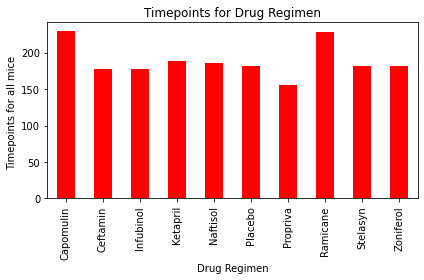

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Get attacker and defender king data
timepoint_data = grouped_drug_df['Timepoint'].count()

# Configure plot and ticks
timepoint_data.plot(kind="bar", facecolor="red")

# Set a Title and labels
plt.title("Timepoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints for all mice ")
plt.tight_layout()
plt.show()


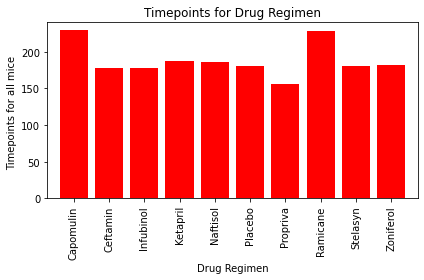

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = merge_df.drop_duplicates(subset='Drug Regimen', keep="last")
drug_regimen = pd.unique(drug_regimen['Drug Regimen'])
drug_regimen.sort()

x_axis = np.arange(len(drug_regimen))
tick_locations = [x for x in x_axis]

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis) - .25)
# Set the limits of the y axis
plt.ylim(0, max(timepoint_data)+10)

                   
plt.bar(x_axis,timepoint_data, facecolor='red', align="center")
plt.xticks(tick_locations,drug_regimen, rotation='vertical')

#final formatting
plt.title("Timepoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints for all mice ")
plt.legend
plt.tight_layout()
plt.show()

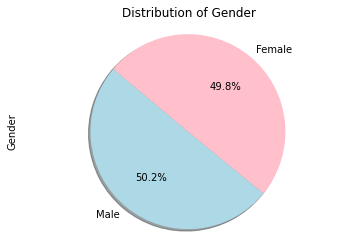

In [101]:
#Creates a df for with only one mouse ID per mouse
total_mice = merge_df.drop_duplicates(subset='Mouse ID', keep="first")

# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = ["Male", "Female"]
mice_gender_count = total_mice['Sex'].value_counts()
colors = ["lightblue","pink"]
explode = (0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mice_gender_count, labels=mice_gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Gender")
plt.ylabel("Gender")
plt.show()


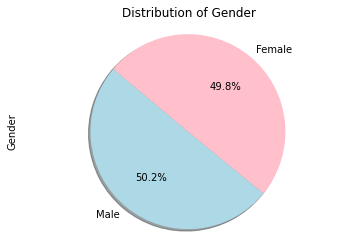

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = ["Male", "Female"]
mice_gender_count = total_mice['Sex'].value_counts()
colors = ["lightblue","pink"]


# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_pie = mice_gender_count.plot(kind="pie", y=mice_gender, title="Distribution of Gender",
                                  autopct="%1.1f%%",colors=colors,shadow=True, startangle=140)
mice_pie.set_ylabel("Gender")

#Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint_max = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
tumor_max = clean_df.groupby(['Tumor Volume (mm3)'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
grouped_merge_df = pd.merge(timepoint_max, clean_df)
grouped_merge_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
40251,20,y769,Ceftamin,Female,6,27,55.025724,2
40252,20,y865,Ceftamin,Male,23,26,52.361982,1
40253,20,z581,Infubinol,Female,24,25,51.807944,2
40254,20,z795,Naftisol,Female,13,29,53.280657,1


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)       
finalvolume = []

for drugs in treatments:
    quartiles = grouped_merge_df[grouped_merge_df['Drug Regimen']==drugs]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    mice = grouped_merge_df.loc[grouped_merge_df['Drug Regimen']==drugs,'Tumor Volume (mm3)']
    # add subset 
    finalvolume.append(mice)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)   
    upper_bound = upperq + (1.5*iqr)
    outlier_tv = grouped_merge_df[(grouped_merge_df['Tumor Volume (mm3)'] < lower_bound) | (grouped_merge_df['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)']

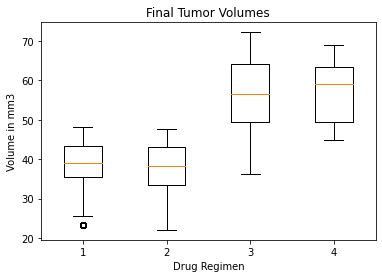

In [105]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volumes')
ax.set_ylabel('Volume in mm3')
ax.set_xlabel('Drug Regimen')
ax.boxplot(finalvolume)
plt.show()

## Line and Scatter Plots

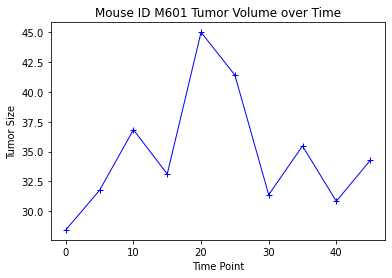

In [106]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = grouped_merge_df[grouped_merge_df['Drug Regimen']=='Capomulin']
mouse_m601_df = capomulin_df[capomulin_df['Mouse ID']=='m601']
clean_m601_df  = mouse_m601_df.drop_duplicates(subset=['Mouse ID', 'Timepoint','Tumor Volume (mm3)'], keep="first")
volume = clean_m601_df['Tumor Volume (mm3)']
timepoint = clean_m601_df['Timepoint']

x_axis = np.arange(0,50,5)

# Plot the line
Mouse_ID_M601, = plt.plot(x_axis, volume, marker="+",color="blue", linewidth=1, label="Mouse ID M601")

# Create a title, x label, and y label for our chart
plt.title("Mouse ID M601 Tumor Volume over Time")
plt.xlabel("Time Point")
plt.ylabel("Tumor Size")
plt.show()

In [107]:
capomulin_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
9,45,u364,Capomulin,Male,18,17,31.023923,3
11,45,y793,Capomulin,Male,17,17,31.896238,2
...,...,...,...,...,...,...,...,...
40098,20,g316,Capomulin,Female,22,22,45.933322,1
40099,20,s710,Capomulin,Female,1,23,42.629963,1
40100,20,l509,Capomulin,Male,17,21,48.070452,2
40101,20,r944,Capomulin,Male,12,25,43.225671,1


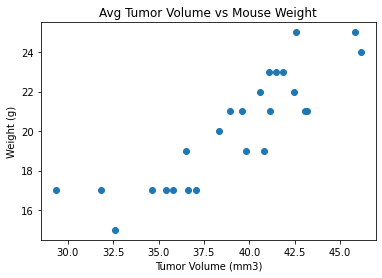

In [108]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
y_values = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
plt.scatter(x_values,y_values)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Avg Tumor Volume vs Mouse Weight')
plt.show()


## Correlation and Regression

The r-squared is: 0.7532769048399545


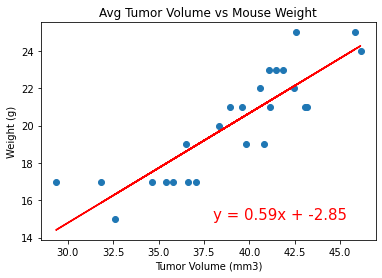

In [109]:

# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
y_values = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,15),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Avg Tumor Volume vs Mouse Weight')
plt.show()
